####  Importing packages

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

points = []
def initializePoints(count):
    for i in range(int(count/3)):
        points.append([random.gauss(0,10),random.gauss(100,10)])
    for i in range(int(count/3)):
        points.append([random.gauss(-30,20),random.gauss(10,10)])
    for i in range(int(count/3)):
        points.append([random.gauss(30,20),random.gauss(10,10)])


In [2]:
#initializing points
initializePoints(1000)

In [3]:
#print(points)

#### Plotting the points

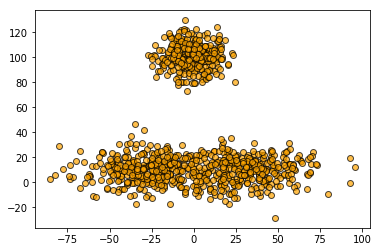

In [4]:
#plotting the points
xs = [x[0] for x in points]
ys = [x[1] for x in points]
plt.scatter(xs, ys,color='orange',alpha=0.7,edgecolor='black')
plt.show()

#### KMeans Clustering

In [5]:
def kMeansClustering(point,cluster):
    #extract x and y
    xs = [i[0] for i in point]
    ys = [j[1] for j in point]
    
    #randomly placing centroid of the clusters
    centroid=[[random.randint(-30,20),random.randint(10,100)]for i in range(cluster)]    
    #print(centroid)
    
    #creating a dataframe which has columns x, y and closest 
    frame=pd.DataFrame({'x':xs,'y':ys,'closest':None})
    #print(frame)
    
    # Continues until all categories stop changing 
    while 1:
        near=frame['closest'].copy(deep=True)
        
        ## Finds the eucledian distance between points and centroid
        for i in range(len(centroid)):
            frame['centroid{}'.format(i)] = (((frame['x'] - centroid[i][0]) ** 2+(frame['y'] - centroid[i][1]) ** 2)**0.5)
        #print(frame)
        
        #Extracting centroid labels 
        centroidLabels=[col for col in frame if col.startswith('centroid')]
        #print(centroidLabels)
        
        #picking min values from three centroid columns and assigning them to colors and minimum
        #so that these can be used to distinguish point on basis of color and for the placement of centroids
        #idxmin actually returns the column name which has the minimum value
        
        color=frame.loc[:,centroidLabels].idxmin(axis=1)   
        minimum=frame.loc[:,centroidLabels].idxmin(axis=1)
         
        #so we used the formatting part to add 0,1,2 to distinguish the three centroids now we just strip the centroid to get
        #the numbers 0,1 or 2 so that we can use them to group
        
        for i in range(len(minimum)):
            minimum[i]=int(minimum[i].strip('centroid'))
            color[i]=colmap[minimum[i]]
            

        frame['closest']=minimum
        frame['color']=color
        
        ## Find mean of all points within a cluster and make it as the centroid 
        for i in range(len(centroid)): #This is the centroid updating part
            centroid[i][0]=np.mean(frame[frame['closest']==i]['x'])
            centroid[i][1]=np.mean(frame[frame['closest']==i]['y'])
        
        #Breaks when the category stops changing
        if near.equals(frame['closest']):
            break
        
        #for plotting figures
        fig=plt.figure(figsize=(5,5))
        plt.scatter(frame['x'],frame['y'],color=frame['color'],alpha=0.6,edgecolor='w')
        for i in range(len(centroid)):
            plt.scatter(centroid[i][0],centroid[i][1],color=colmap[i],edgecolor='k')
        
        plt.ylim(-100,150)
        plt.xlim(-100,100)
        plt.show()
        return np.std(frame['closest']) #returns the standard deviation of the values

#### Running the algorithm


Iteration Number: 0


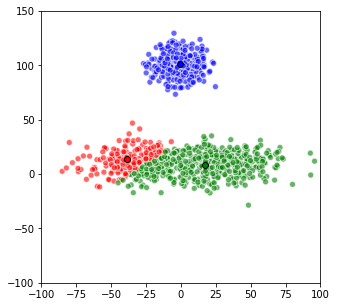

Iteration Number: 1


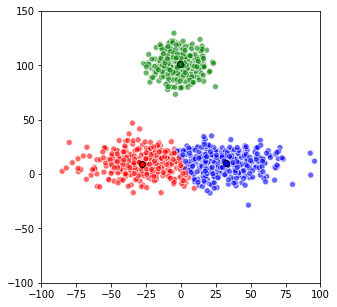

Iteration Number: 2


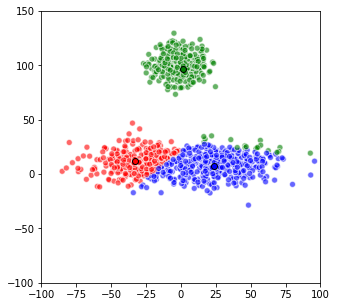

Iteration Number: 3


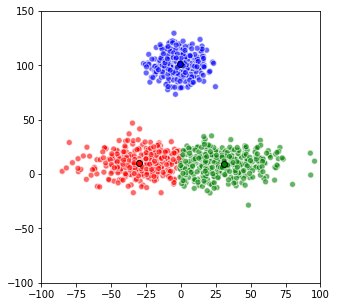

Iteration Number: 4


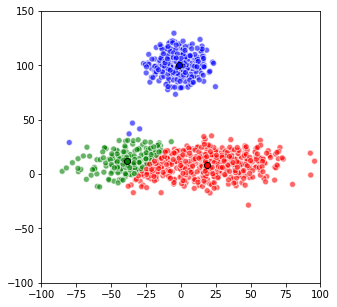

Iteration Number: 5


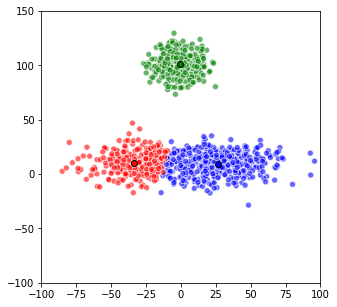

Iteration Number: 6


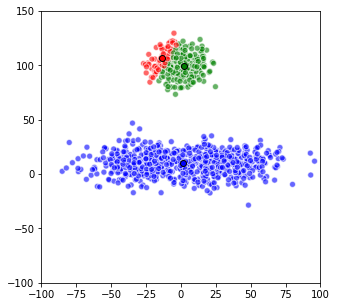

Iteration Number: 7


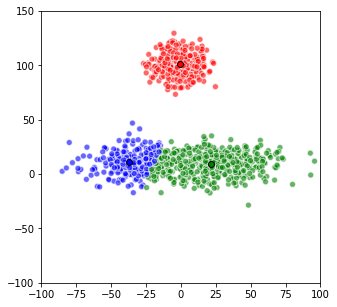

Iteration Number: 8


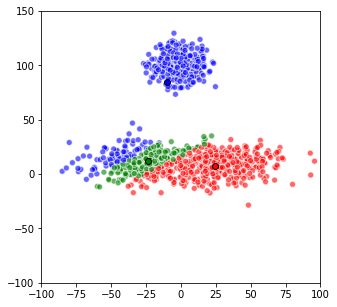

Iteration Number: 9


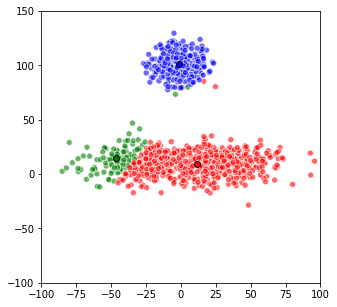

The best cluster is obtained in iteration 6 where the standard deviation is 0.615315242035589


In [8]:
colmap={0:'r',1:'g',2:'b'}
minimum=1
iteration=0
epoch=10
cluster=3
for j in range(0,epoch):
    print("Iteration Number:",j)
    temp=kMeansClustering(points,cluster)
    if temp<minimum:
        minimum=temp
        iteration=j
        
#We use variance to evaluate the best cluster        
print('The best cluster is obtained in iteration',iteration,'where the standard deviation is', minimum)

#### References:


In [7]:
'''
The following sites were referred to for understanding KMeans Clustering. Therefore, the underlying logic and methodology would be similar:

1) http://benalexkeen.com/k-means-clustering-in-python/

2) https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python

3)https://www.datascience.com/blog/k-means-clustering
'''

'\nThe following sites were referred to for understanding KMeans Clustering. Therefore, the underlying logic and methodology would be similar:\n\n1) http://benalexkeen.com/k-means-clustering-in-python/\n\n2) https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python\n\n3)https://www.datascience.com/blog/k-means-clustering\n'